In [1]:
import matplotlib.pyplot as pl
import ocean
import numpy as np
from numpy.random import multinomial

%matplotlib inline

Сгенерируем случайный океан. Первая строка - общие параметры: скорость хищника, скорость жертвы, вероятность съесть, период размножения хищников, период размножения жертв, выносливость хищников. Дальше размер океана: будет создан океан размером $ocean\_size\ x\ ocean\_size$. В одной клетке с вероятностями, указанными вторым параметром $multinomial$, появляются соответственно ничего, хищник, жертва, препятствие.

In [2]:
with open("ocean_param_2.txt", 'w') as file:
    print("0.9 0.5 1 17 8 15", file=file)
    ocean_size = 20
    for i in range(ocean_size):
        for j in range(ocean_size):
            for value, i in zip(multinomial(1, [3/5, 1/10, 1/5, 1/10], size=1)[0], range(4)):
                if value == 1:
                    print(i, file=file, end=" ")
        print("", file=file)

Теперь смоделируем жизнь в океане. Будет сделано $duration$ ходов.

In [6]:
my_ocean = ocean.init_ocean("ocean_param_2.txt")
duration = 1000
statistic = []
for i in range(duration):
    my_ocean.make_turn()
    statistic.append(my_ocean.creatures_counter(True))

In [7]:
statistic = np.array(statistic)

Теперь построим график зависимости числа хищников и жертв от номера хода.

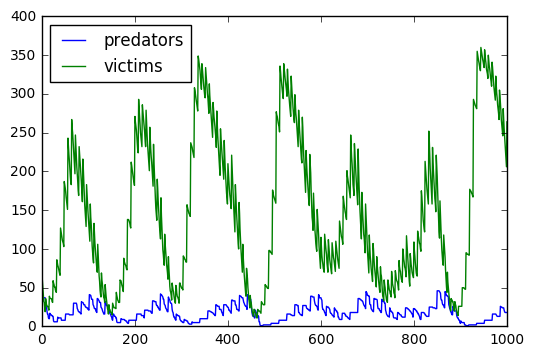

In [8]:
pl.figure()
pl.plot(range(1, duration + 1), statistic[:,0], label='predators')
pl.plot(range(1, duration + 1), statistic[:,1], label='victims')
pl.legend(loc=2)

Видим, что гипотеза о цикличности действительно выполняется.